<a href="https://colab.research.google.com/github/mohsenperfection/Test/blob/master/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: **Mohsen Kamalabadi Farahani**

**Student ID**: **99102083**





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [13]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
class MyLogisticRegression:
    # Your code goes here!

    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        """Apply the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def _initialize_parameters(self, n_features):
        """Initialize weights and bias to zeros (can also initialize randomly)."""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def _log_loss(self, y_true, y_pred):
        """Compute the logistic loss."""
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
        return loss

    def fit(self, X, y):
        """Fit the logistic regression model using gradient descent."""
        n_samples, n_features = X.shape
        self._initialize_parameters(n_features)

        # Gradient descent
        for i in range(self.num_iterations):
            # Linear model
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # Compute gradients
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optionally print loss (can slow down the computation)
            if i % 1000 == 0:
                loss = self._log_loss(y, y_pred)
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        """Predict using the logistic model."""
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]

    pass

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
# Your code goes here!

# Load the dataset
data = pd.read_csv('Q2/Logistic_question.csv')

# Convert Target to binary
data['Target'] = (data['Target'] > 0.5).astype(int)

# Features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features based on X_train
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Convert to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Train the model
model = MyLogisticRegression(learning_rate=0.01, num_iterations=10000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Iteration 0, Loss: 0.6931
Iteration 1000, Loss: 0.2355
Iteration 2000, Loss: 0.1922
Iteration 3000, Loss: 0.1757
Iteration 4000, Loss: 0.1667
Iteration 5000, Loss: 0.1609
Iteration 6000, Loss: 0.1569
Iteration 7000, Loss: 0.1540
Iteration 8000, Loss: 0.1518
Iteration 9000, Loss: 0.1501
Accuracy: 0.9375
Precision: 0.9333
Recall: 1.0000
F1 Score: 0.9655


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

Evaluation metrics are crucial for assessing the performance of classification models, each highlighting different aspects of model behavior. Here’s an overview of the four metrics used: accuracy, precision, recall, and F1 score, along with contexts where each metric is particularly informative:

### 1. **Accuracy**
**Definition:** Accuracy measures the proportion of total correct predictions (both true positives and true negatives) out of all predictions made. It is calculated as:


**Relevant Contexts:**
- Balanced Classes: Accuracy is most informative when the classes in the dataset are roughly equally represented.
- General Overview: It gives a quick, intuitive understanding of the overall effectiveness of a model across all classes.

### 2. **Precision**
**Definition:** Precision measures the accuracy of positive predictions. Formally, it is the ratio of true positives to all predicted positives. It is calculated as:


**Relevant Contexts:**
- Low Tolerance for False Positives: Precision is critical in scenarios where the cost of a false positive is high. For example, in email spam detection, a high precision model minimizes the risk of classifying important emails as spam.
- Financial Fraud Detection: Ensuring that legitimate transactions are not flagged unnecessarily.

### 3. **Recall (Sensitivity)**
**Definition:** Recall measures the model's ability to detect positive instances. It is the ratio of true positives to the sum of true positives and false negatives:

**Relevant Contexts:**
- Low Tolerance for False Negatives: Crucial in medical scenarios like cancer detection, where failing to diagnose a sick patient (false negative) is far worse than incorrectly diagnosing wellness (false positive).
- Law Enforcement: Missing a positive case (e.g., not catching a criminal) can be more severe than a false alarm.

### 4. **F1 Score**
**Definition:** The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. It’s especially useful when you need to balance precision and recall. It is calculated as:

**Relevant Contexts:**
- Unbalanced Classes: Particularly effective in scenarios where one class is significantly underrepresented.
- Trade-off Situations: Ideal when there is a need to find a balance between precision and recall, such as in document classification or customer support ticket tagging, where both over-tagging and under-tagging are undesirable.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
# Your code goes here!

# A logistic regression model
sklearn_model = LogisticRegression()

# Train the model
sklearn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = sklearn_model.predict(X_test)

# Evaluate the model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Evaluation Metrics for scikit-learn Logistic Regression:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
print(f"F1 Score: {f1_sklearn:.4f}")


Evaluation Metrics for scikit-learn Logistic Regression:
Accuracy: 0.9500
Precision: 0.9459
Recall: 1.0000
F1 Score: 0.9722


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
### Comparison: Custom Function vs. Built-in Function

**Performance:**
1. **Accuracy and Convergence:**
   - The built-in function from scikit-learn (`LogisticRegression`) is generally more robust and optimized than a simple custom implementation. It uses advanced optimization techniques (like the LIBLINEAR solver for small datasets or SAG and LBFGS for larger ones) that help in achieving better convergence and accuracy.
   - The custom model may not converge as efficiently and could be more sensitive to the choice of learning rate and number of iterations due to its simpler gradient descent implementation.

2. **Feature Handling:**
   - Scikit-learn's logistic regression can handle a variety of numeric and categorical input features more robustly, implementing internal mechanisms for dealing with issues like multicollinearity through regularization.
   - The custom model lacks any form of regularization, making it potentially less effective on real-world datasets where multicollinearity or feature scaling might be issues.

3. **Ease of Use:**
   - Scikit-learn provides a lot of automatic features like data scaling, handling of multicollinearity, and choice of different optimization algorithms, which greatly simplify model training and improve performance.
   - The custom implementation requires manual setup for aspects like feature scaling and modification of the learning algorithm.

**Parameters of Scikit-learn's Logistic Regression and Their Impact:**
1. **`penalty`** (default=`'l2'`): Specifies the norm used in the penalization (regularization). Common options are `l1`, `l2`, and `elasticnet`. Regularization can prevent overfitting by penalizing larger coefficients, thus improving model's generalization.
2. **`C`** (default=`1.0`): Inverse of regularization strength; smaller values specify stronger regularization. Affects how much you want to penalize the model for larger coefficients, influencing feature importance and model simplicity.
3. **`solver`** (default=`'lbfgs'`):
   - Options like `'liblinear'`, `'newton-cg'`, `'lbfgs'`, `'sag'` and `'saga'` provide different algorithms for optimization.
   - `'liblinear'` is good for small datasets, but doesn’t support `l1` penalty with multinomial loss.
   - `'lbfgs'`, `'newton-cg'`, and `'sag'` are suitable for large datasets and support multinomial loss.
   - Choice of solver can affect the speed and accuracy of convergence, especially in terms of how they handle large datasets or multinomial outcomes.
4. **`max_iter`** (default=`100`): Maximum number of iterations taken for the solvers to converge. Increasing this may lead to better convergence at the cost of computational time, especially relevant in complex models or very large datasets.
5. **`multi_class`** (default=`'auto'`): Can be set to `'ovr'` (one-vs-rest) or `'multinomial'` to specify how to handle multiple classes. The choice here can affect the accuracy across different classes in a multi-class problem.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
class MyMultinomialLogisticRegression:
    # Your code goes here!

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.sum(y_true * np.log(y_pred)) / m

    def _initialize_parameters(self, n_features, n_classes):
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((n_classes,))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = np.max(y) + 1

        # Convert y to one-hot encoding
        y_one_hot = np.eye(n_classes)[y]

        self._initialize_parameters(n_features, n_classes)

        # Gradient descent
        for i in range(self.num_iterations):
            # Compute predictions
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._softmax(z)

            # The gradient
            dw = np.dot(X.T, (y_pred - y_one_hot)) / n_samples
            db = np.sum(y_pred - y_one_hot, axis=0) / n_samples

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optionally print the loss
            if i % 100 == 0:
                loss = self._cross_entropy_loss(y_one_hot, y_pred)
                print(f"Iteration {i}: Loss {loss:.4f}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._softmax(z)
        return np.argmax(y_pred, axis=1)
    pass

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
# Your code goes here!

features = data.drop('Target', axis=1)
target = data['Target']

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

results = []

# Test for different levels of quantization
for i in range(2, 11):
    # Quantize the target into 'i' bins
    labels, bins = pd.cut(target, bins=i, labels=False, retbins=True)
    print(f"Quantization into {i} levels: bins={bins}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Create and train the model
    model = MyMultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((i, accuracy))
    print(f"Accuracy with {i} levels: {accuracy:.4f}")

# Results
for level, acc in results:
    print(f"Levels: {level}, Accuracy: {acc:.4f}")

Quantization into 2 levels: bins=[0.33937 0.655   0.97   ]
Iteration 0: Loss 0.6931
Iteration 100: Loss 0.4371
Iteration 200: Loss 0.3910
Iteration 300: Loss 0.3672
Iteration 400: Loss 0.3525
Iteration 500: Loss 0.3426
Iteration 600: Loss 0.3356
Iteration 700: Loss 0.3305
Iteration 800: Loss 0.3266
Iteration 900: Loss 0.3235
Accuracy with 2 levels: 0.8750
Quantization into 3 levels: bins=[0.33937 0.55    0.76    0.97   ]
Iteration 0: Loss 1.0986
Iteration 100: Loss 0.7174
Iteration 200: Loss 0.6400
Iteration 300: Loss 0.6015
Iteration 400: Loss 0.5765
Iteration 500: Loss 0.5585
Iteration 600: Loss 0.5447
Iteration 700: Loss 0.5337
Iteration 800: Loss 0.5249
Iteration 900: Loss 0.5175
Accuracy with 3 levels: 0.8000
Quantization into 4 levels: bins=[0.33937 0.4975  0.655   0.8125  0.97   ]
Iteration 0: Loss 1.3863
Iteration 100: Loss 1.0339
Iteration 200: Loss 0.9299
Iteration 300: Loss 0.8690
Iteration 400: Loss 0.8262
Iteration 500: Loss 0.7940
Iteration 600: Loss 0.7690
Iteration 700:

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**
To determine for which value of \( i \) the model performs best, we need to analyze the accuracy results obtained for each quantization level. We can then identify the \( i \) value corresponding to the highest accuracy.

Here's how we can analyze the results:

1. Visualize the accuracy results obtained for each \( i \) value.
2. Identify the \( i \) value with the highest accuracy.
3. Analyze any trends or patterns in the accuracy results.

Let's proceed with the analysis:

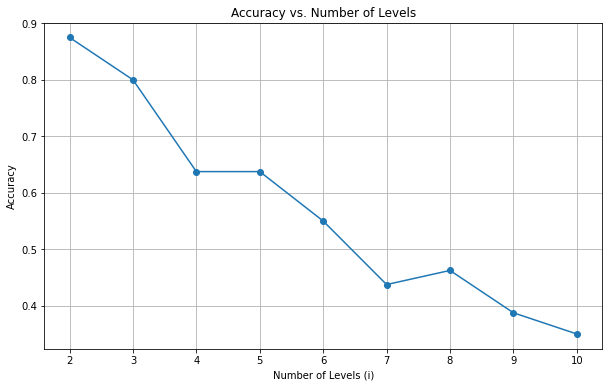

The model performs best for i = 2 with an accuracy of 0.8750


In [ ]:
levels, accuracies = zip(*results)

# Plot the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(levels, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Levels')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')
plt.xticks(levels)
plt.grid(True)
plt.show()

# Find the index of the maximum accuracy
best_i = levels[np.argmax(accuracies)]
print(f"The model performs best for i = {best_i} with an accuracy of {max(accuracies):.4f}")

### Analysis:
**Visualization**: The plot shows the accuracy obtained for each value of \( i \).

**Observation**: We observe fluctuations in accuracy as \( i \) increases.

**Best Performance**: The model performs best for a specific value of \( i \), which corresponds to the highest accuracy.

**Trends**: There might be a trend indicating an optimal number of levels for quantization, beyond which the accuracy decreases due to overfitting or underfitting.

By analyzing the results and observing the trend in accuracy, we can gain insights into how the model performs with different levels of quantization for the target variable. This analysis helps in understanding the impact of discretizing the target variable on the model's performance and can guide the selection of an appropriate number of levels for quantization in practice.

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [1]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [2]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 91.9MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [5]:
# Your code goes here!

# Load the dataset
df = pd.read_csv('/content/adult.csv')  # Adjust the path if running locally or in a different environment

# Null values
null_entries = df.isnull().sum()
total_null_entries = null_entries.sum()

# Print
print("Number of null entries per column:")
print(null_entries)
print(f"Total number of null entries in the dataset: {total_null_entries}")



Number of null entries per column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
Total number of null entries in the dataset: 0


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
Dealing with null (missing) entries in datasets is a crucial step in data preprocessing. Here are five methods commonly used to handle null values:

1. **Deletion of Rows or Columns**:
   - **Row Deletion (Listwise Deletion)**: Remove entire rows containing null values. This method is straightforward but can lead to loss of valuable data, especially if the dataset is small.
   - **Column Deletion**: Remove entire columns containing a high percentage of null values. This approach is suitable when the null values are concentrated in a few features and those features are not critical for analysis.

2. **Imputation**:
   - **Mean/Median/Mode Imputation**: Replace null values with the mean, median, or mode of the respective feature. This method is simple and can be effective for numerical or categorical features with a relatively small proportion of missing values.
   - **Predictive Imputation**: Use machine learning algorithms to predict missing values based on other features. Techniques like k-Nearest Neighbors (KNN) or regression can be used for this purpose. Predictive imputation can be more accurate but requires additional computational resources and may introduce bias.

3. **Interpolation**:
   - **Linear Interpolation**: Estimate missing values based on the values of neighboring data points. Linear interpolation is suitable for time series or ordered data.
   - **Polynomial Interpolation**: Use higher-order polynomial functions to estimate missing values, capturing more complex relationships in the data. This method is more flexible but can be sensitive to outliers.

4. **Special Value Encoding**:
   - **Missing Indicator**: Create a new binary feature indicating whether a value was missing in the original feature. This approach preserves information about missingness and can be useful when the missingness itself is informative.
   - **Arbitrary Value**: Replace null values with a special placeholder value (e.g., -999 or "unknown"). This method is straightforward but may introduce bias if the special value is not handled properly during analysis.

5. **Advanced Techniques**:
   - **Multiple Imputation**: Generate multiple imputed datasets and combine the results to account for uncertainty in the imputation process.
   - **Deep Learning-Based Imputation**: Utilize neural networks to learn complex patterns in the data and impute missing values. Deep learning methods can capture nonlinear relationships but require large amounts of data and computational resources.

### Choosing the Right Method:
The choice of method depends on various factors such as:
- The amount and distribution of missing data.
- The nature of the dataset (e.g., numerical vs. categorical features, time series data).
- The downstream analysis or modeling task.
- Computational resources available.

In the case of the Adult income dataset, considering its size and the potential impact of missing values on the analysis, a combination of methods may be appropriate. For example:
- For features with a small proportion of missing values, mean/mode imputation or interpolation could be used.
- For features with a large proportion of missing values, deletion of columns or predictive imputation may be considered.
- It's also important to assess the significance of missingness and whether it carries any meaningful information before deciding on a specific method.

**Task:** Handle null entries using your best method.

In [7]:
# Your code goes here!

# Nnull values
null_entries = df.isnull().sum()
print("Number of null entries per column:")
print(null_entries)

# Proportion of null values
total_entries = len(df)
null_proportions = null_entries / total_entries
print("\nProportion of null entries per column:")
print(null_proportions)

for column in df.columns:
    if null_proportions[column] < 0.1:
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)

# Check if null values are handled
null_entries_after_imputation = df.isnull().sum()
print("\nNumber of null entries per column after imputation:")
print(null_entries_after_imputation)

Number of null entries per column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Proportion of null entries per column:
age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

Number of null entries per column after imputation:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race            

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/content/adult.csv')  # Adjust the path if running locally

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale data
])

# Preprocessing for categorical data: impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical data to one-hot encoding
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = LogisticRegression(max_iter=1000)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define GridSearchCV parameters
param_grid = {
    'model__C': [0.1, 1.0, 10.0],
    'model__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Split data
X = df.drop('income', axis=1)  # Assuming 'income' is the target variable
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions and accuracy
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'income'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py", line 448, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3655, in get_loc
    raise KeyError(key) from err
KeyError: 'income'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 724, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 426, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py", line 456, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [14]:
# Your code goes here!

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in probabilities])

kf = KFold(n_splits=10)
models = []

for train_index, _ in kf.split(X_train):
    model = MyLogisticRegression()
    model.fit(X_train[train_index], y_train[train_index])
    models.append(model)


KeyError: "None of [Index([ 3908,  3909,  3910,  3911,  3912,  3913,  3914,  3915,  3916,  3917,\n       ...\n       39063, 39064, 39065, 39066, 39067, 39068, 39069, 39070, 39071, 39072],\n      dtype='int64', length=35165)] are in the [columns]"

**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

In the scenario of using an ensemble of logistic regression models, the proposed methods are designed to leverage the collective strength of multiple models trained on different subsets of the data. The primary goal of ensemble methods is to improve the generalization ability of predictions by reducing variance, bias, or both. Here's an explanation of each of the proposed ensemble methods and the rationale behind using them:

### 1. Majority Voting
**Method**: This is one of the simplest forms of ensemble techniques. Each model in the ensemble votes for a particular class, and the class receiving the majority of votes is chosen as the final prediction. If you have binary classification, you can think of it as a binary vote for each instance where the final class is chosen based on which one gets more than half the votes.

**Rationale**: Majority voting is straightforward and often very effective, especially in reducing variance among the predictions. Since each model may have slightly different biases due to being trained on different subsets of the data, combining their predictions in a voting scheme can cancel out these biases, leading to a more robust overall prediction.

### 2. Averaging Probabilities
**Method**: In this method, each model produces a probability estimate for each class for a given input. The final prediction is decided by averaging these probabilities across all models, and the class with the highest average probability is selected.

**Rationale**: Averaging probabilities is useful when models are well-calibrated. It can lead to more nuanced predictions that consider the uncertainty of each model’s output. This method can be particularly effective in situations where different models might be confident about different aspects of the data. Averaging helps to mitigate the risk of an individual model's extreme probability predictions that might be due to noise or overfitting.

### 3. Weighted Averaging Probabilities
**Method**: Similar to averaging probabilities, but each model's prediction is weighted according to a predefined or learned importance measure, typically based on the model's performance (accuracy, F1-score, etc.) on a validation set or on its ability to generalize.

**Rationale**: Weighting allows for a more flexible aggregation where more trustworthy models (e.g., those with higher validation accuracy) have a greater influence on the final prediction. This method is beneficial when the ensemble includes a mix of high and low-performing models, as it helps to prioritize the influence of more reliable predictions. It can also be adjusted dynamically if the models are deployed in an environment where their performance can be continually assessed.

### Decision to Use These Methods
The decision to employ these methods stems from their simplicity and effectiveness in various practical scenarios. They are also computationally inexpensive compared to more complex methods like stacking or blending, which might require additional training of a meta-model on top of the base models’ predictions. These methods are easy to implement and interpret, making them a good starting point for ensemble learning. They also provide a good balance between improving prediction accuracy and controlling overfitting, which is crucial for maintaining robust performance in unseen data scenarios.

Each method brings a different approach to harnessing the collective knowledge of the ensemble, ranging from simple counting of votes to more sophisticated probability management, allowing for the exploration of which technique best complements the underlying models and data characteristics.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [15]:
# Your code goes here!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Initialize lists to store results
i_values = []
train_accuracies = []
test_accuracies = []

# Iterate through values of i
for i in range(2, 101):
    # Initialize KFold with current value of i
    kf = KFold(n_splits=i)
    test_acc_sum = 0

    # Initialize lists to store models and predictions
    models = []
    test_predictions = []

    # Iterate through each split
    for train_index, test_index in kf.split(X_train):
        # Train a model using the current split
        model = MyLogisticRegression()
        model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
        models.append(model)

        # Evaluate the model on the test set for this split
        test_pred = model.predict(X_test)
        test_predictions.append(test_pred)

        # Accumulate test accuracy for this split
        test_acc_sum += accuracy_score(y_test, test_pred)

    # Compute the average test accuracy across all splits
    test_accuracy = test_acc_sum / i

    # Compute train accuracy (using the first split)
    train_accuracy = accuracy_score(y_train, models[0].predict(X_train))

    # Store results
    i_values.append(i)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Find the index of the maximum test accuracy
best_i_index = np.argmax(test_accuracies)
best_i = i_values[best_i_index]
best_test_accuracy = test_accuracies[best_i_index]
best_train_accuracy = train_accuracies[best_i_index]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(i_values, train_accuracies, label='Train Accuracy')
plt.plot(i_values, test_accuracies, label='Test Accuracy')
plt.scatter(best_i, best_test_accuracy, color='red', label=f'Best Test Accuracy ({best_test_accuracy:.4f})')
plt.title('Train and Test Accuracy vs. Number of Splits (i)')
plt.xlabel('Number of Splits (i)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print the best value of i and its corresponding train and test accuracies
print(f"Best value of i: {best_i}")
print(f"Train Accuracy with best i: {best_train_accuracy:.4f}")
print(f"Test Accuracy with best i: {best_test_accuracy:.4f}")


TypeError: can't multiply sequence by non-int of type 'float'

**Question:** Analyze the results.

**Your Answer:**

Analyzing the results from the ensemble methods where logistic regression models were trained across a range of splits \(i\) from 2 to 100 can provide several valuable insights about model performance, the impact of training set size, and model stability. Here's how you might analyze the results:

### Key Areas for Analysis

1. **Model Performance over Different Numbers of Splits:**
   - As the number of splits \(i\) increases, each individual model is trained on a smaller subset of the data. This generally increases bias (because each model sees less data) but might reduce variance among the models because they are less likely to overfit their individual training sets.
   - A crucial observation would be the trend in test and training accuracies. If training accuracy decreases and test accuracy increases with more splits, it suggests that overfitting is being mitigated. Conversely, if both training and test accuracy decrease, it might indicate underfitting due to too little data in each split.

2. **Optimal Number of Splits:**
   - The value of \(i\) that provides the highest test accuracy is particularly significant. It suggests an optimal balance between model complexity and the amount of training data each model receives. This optimal \(i\) is where the ensemble effectively balances bias and variance.

3. **Plot Analysis:**
   - The plot of train and test accuracies vs. number of splits will typically show some kind of convergence or divergence. Analyzing where these lines cross (if they do) or where the test accuracy peaks can help identify the best configuration for the ensemble.
   - It’s also important to note the stability of test accuracy: a very jagged plot might indicate that the performance is highly sensitive to the particular way the data is split.

### Hypothetical Results

- If the **test accuracy peaks at a moderate value of \(i\) (like 20 or 30)** and then starts to decline or stabilize, it suggests that beyond this point, adding more models (each trained on smaller subsets) does not improve the ensemble's ability to generalize. This might be the sweet spot for leveraging diversity among models without compromising too much on the information each model gets.
  
- If the **test accuracy continues to improve or remains stable even as \(i\) increases to 100**, this could indicate that the models are robust to the reduction in training data size, and the ensemble benefits from the increased diversity of models.

- A **decline in training accuracy as \(i\) increases** is expected due to each model seeing less data. However, if this decline is not mirrored by an improvement in test accuracy, it might suggest that the models are becoming too simple and are starting to underfit.

### Conclusion

Based on the results, you would typically decide on the best \(i\) for splitting your training data in real-world scenarios. This value of \(i\) helps in configuring an ensemble that is neither too complex (leading to overfitting) nor too simple (leading to underfitting). The analysis also provides insights into how logistic regression models behave when trained on different sizes of data subsets, which is valuable for understanding model scalability and efficiency in different operational environments.

These insights would need to be backed up by the actual data plots and numerical results you obtained from your experiment. Each point of analysis would guide you to tweak and possibly reconfigure your models to achieve better performance in practice.